# Tabular data with pandas and DataFrames
see 1-28 notes


# plotting
if you want to plot somehting in python use the library matplotlib.plot as plt
- assume you want to plot a figure where you have cap as a function of dam
- call the value of the capacity, value = df['capacity_mw'].tolist()
- then call the labels = df['name'].tolist()

then we plot the figure
call plt.figure() funcction
then make the bar
- plt.bar(labes, values)
then give it a title
- plt.title('title')
then do the x and y labels
-plt.xlabel('dam')
-plt.ylabel('cap')
then display the figure
plt.show()

### default jupyter magic commands
- %time: time teh execution ofa single statement
- %timeit: Time repeated execution of a single statement for more accuracy

more 
- %prun: run code with the profiler
- %lprun: run code with line-by-line profiler
- %memit: measrue the memory use of a single statement
- %mprun: run code with line-by0line memory profiler

In [15]:
%timeit sum(range(100))

472 ns ± 7.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
%%timeit
total = 0
for i in range(100):
    for j in range(i):
        total += i *j

192 μs ± 1.49 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
import random
L = [random.random() for i in range(100000)]

%timeit L.sort()

336 μs ± 4.96 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
import random
L = [random.random() for i in range(1000000)]

%time L.sort()
print('now L is sorted')
%time L.sort()

CPU times: total: 156 ms
Wall time: 185 ms
now L is sorted
CPU times: total: 15.6 ms
Wall time: 21.3 ms


In [19]:
def fiblist(n):
    L = []
    a, b = 0,1
    while len(L) < n:
        a, b = b, a +b
        L.append(a)
    return L

print(fiblist(10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [20]:
%prun fiblist(100000)

         200005 function calls in 0.328 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.257    0.257    0.271    0.271 2204996718.py:1(fiblist)
        1    0.057    0.057    0.328    0.328 <string>:1(<module>)
   100000    0.007    0.000    0.007    0.000 {method 'append' of 'list' objects}
   100001    0.006    0.000    0.006    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.328    0.328 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [22]:
%load_ext line_profiler
%lprun -f fiblist fiblist(100000)

Timer unit: 1e-07 s

Total time: 0.420403 s
File: C:\Users\Barrs\AppData\Local\Temp\ipykernel_29052\2204996718.py
Function: fiblist at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def fiblist(n):
     2         1         15.0     15.0      0.0      L = []
     3         1         17.0     17.0      0.0      a, b = 0,1
     4    100001     556700.0      5.6     13.2      while len(L) < n:
     5    100000    3086116.0     30.9     73.4          a, b = b, a +b
     6    100000     561175.0      5.6     13.3          L.append(a)
     7         1          7.0      7.0      0.0      return L

In [11]:
def fibgen(n):
    a,b = 0,1
    for c in range(n):
        a, b = b + b
        yield a

In [23]:
%lprun -f fibgen fibgen(100000)

Timer unit: 1e-07 s

Total time: 0 s
File: C:\Users\Barrs\AppData\Local\Temp\ipykernel_29052\3497883311.py
Function: fibgen at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def fibgen(n):
     2                                               a,b = 0,1
     3                                               for c in range(n):
     4                                                   a, b = b + b
     5                                                   yield a

# variables
### categorical variabels
also known as **discrete** or **qualitative** variables
nominal variables are unordered categorical variables (i.e., not consisting of numerical values) mutually exclusive examples
- person gender
- ethnicity

### Numerical variables
numeric variables **quantitative** have values that describe a measurable quanitty as a number, can assume cuntinous or discrete values

# Descriptive (summary) statistics
- **Descriptive statistics**: statistics that quantitativley describe or summarize features of a collection of information

### Goal
Describe a dataset with a smaller number of statistics or figures

    ## Inteermezzo: get a zip file from the web

In [25]:
import urllib.request
import zipfile
import io
import csv

In [26]:
url = 'https://nrvis.com/download/data/ca/ca-netscience.zip'

urllib.request.urlretrieve(url, 'dataset1.zip')

('dataset1.zip', <http.client.HTTPMessage at 0x25d524f3b50>)

In [27]:
datazipfile = zipfile.ZipFile('dataset1.zip')
datazipfile.namelist()

['ca-netscience.mtx', 'readme.html']

In [29]:
datafile = datazipfile.open(datazipfile.namelist()[0], mode='r')

datafile = io.TextIOWrapper(datafile)

print(datafile)

<_io.TextIOWrapper name='ca-netscience.mtx' encoding='utf-8'>


In [30]:
csvreader = csv.reader(datafile, delimiter=' ')

for row in csvreader:
    print(row)

['%MatrixMarket', 'matrix', 'coordinate', 'pattern', 'symmetric', '']
['%', '379', '379', '914']
['2', '1']
['3', '1']
['4', '1']
['5', '1']
['16', '1']
['44', '1']
['113', '1']
['131', '1']
['250', '1']
['259', '1']
['3', '2']
['5', '4']
['13', '4']
['14', '4']
['15', '4']
['16', '4']
['44', '4']
['45', '4']
['46', '4']
['47', '4']
['61', '4']
['126', '4']
['127', '4']
['128', '4']
['146', '4']
['152', '4']
['153', '4']
['154', '4']
['164', '4']
['165', '4']
['166', '4']
['176', '4']
['177', '4']
['249', '4']
['250', '4']
['274', '4']
['313', '4']
['314', '4']
['323', '4']
['324', '4']
['330', '4']
['371', '4']
['373', '4']
['374', '4']
['15', '5']
['16', '5']
['44', '5']
['45', '5']
['46', '5']
['47', '5']
['176', '5']
['177', '5']
['199', '5']
['201', '5']
['202', '5']
['204', '5']
['231', '5']
['235', '5']
['236', '5']
['237', '5']
['238', '5']
['249', '5']
['250', '5']
['254', '5']
['298', '5']
['313', '5']
['314', '5']
['373', '5']
['374', '5']
['7', '6']
['8', '6']
['8', '7']
['

In [32]:
nfriends = {}

for row in csvreader:
    if row[0].isnumeric():
        nfriends[int(row[0])] = \
        nfriends.get(int(row[0]),0) + 1
        nfriends[int(row[1])] = \
        nfriends.get(int(row[1]),0) + 1

datafile.close()

In [31]:
def getNetworkDataset (url='http://nrvis.com/download/data/ca/ca-netscience.zip'):

    urllib.request.urlretrieve(url, 'dataset1.zip')
    datazipfile = zipfile.ZipFile('dataset1.zip')
    datafile = datazipfile.open(datazipfile.namelist()[0], mode='r')
    datafile = io.TextIOWrapper(datafile)

    csvreader = csv.reader(datafile, delimiter=' ')

    nfriends = {}

    for row in csvreader:
        if row[0].isnumeric():
            nfriends[int(row[0])] = nfriends.get(int(row[0]),0) + 1
            nfriends[int(row[1])] = nfriends.get(int(row[1]),0) + 1

    datafile.close()
    
    return nfriends

In [33]:
nfriends = getNetworkDataset()

nfriends

{2: 2,
 1: 10,
 3: 2,
 4: 34,
 5: 27,
 16: 21,
 44: 4,
 113: 15,
 131: 12,
 250: 6,
 259: 3,
 13: 9,
 14: 4,
 15: 16,
 45: 10,
 46: 8,
 47: 8,
 61: 4,
 126: 6,
 127: 6,
 128: 8,
 146: 3,
 152: 1,
 153: 3,
 154: 3,
 164: 4,
 165: 4,
 166: 4,
 176: 8,
 177: 8,
 249: 3,
 274: 2,
 313: 5,
 314: 5,
 323: 4,
 324: 4,
 330: 4,
 371: 2,
 373: 4,
 374: 3,
 199: 7,
 201: 14,
 202: 7,
 204: 6,
 231: 14,
 235: 2,
 236: 10,
 237: 4,
 238: 4,
 254: 2,
 298: 4,
 7: 6,
 6: 2,
 8: 12,
 190: 4,
 191: 2,
 192: 3,
 193: 3,
 26: 27,
 62: 4,
 63: 3,
 64: 3,
 65: 10,
 137: 4,
 189: 3,
 342: 3,
 343: 3,
 344: 1,
 10: 6,
 9: 3,
 11: 3,
 12: 3,
 67: 19,
 68: 5,
 69: 9,
 17: 9,
 18: 8,
 19: 3,
 20: 2,
 278: 2,
 279: 2,
 334: 8,
 366: 4,
 367: 4,
 368: 4,
 29: 1,
 58: 4,
 172: 6,
 258: 5,
 261: 2,
 365: 2,
 208: 1,
 22: 3,
 21: 12,
 23: 11,
 24: 10,
 33: 11,
 109: 2,
 220: 5,
 221: 3,
 232: 5,
 233: 5,
 268: 4,
 287: 2,
 288: 2,
 50: 4,
 51: 15,
 52: 14,
 54: 2,
 55: 2,
 227: 2,
 228: 2,
 79: 3,
 140: 6,
 229: 2,

In describing a single data set we are interested in
- size of the data set
- largest value in the dataset
- smallest value in the dataset
- sum of the values
- mean (or average)

### Dataset size

In [34]:
print(len(nfriends))

379


### Largest value in the dataset

In [35]:
print(max(nfriends.values()))

34


### Smallest value in the dataset

In [36]:
print(min(nfriends.values()))

1


### Values sum

In [37]:
print(sum(nfriends.values()) // 2)

914


### Numpy module

In [38]:
import numpy as np
fr = np.array(list(nfriends.values()))

fr.dtype

dtype('int64')

### Histograms
>One of the best ways to summarize a variable is to report the values that appear in the dataset and how many times each value appears. This description is called the distribution of the variable.<br>
>The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value. 
<br>

**Frequency**  number of times the value appears.

Counter({2: 74, 3: 72, 4: 62, 6: 36, 5: 33, 1: 27, 7: 20, 8: 12, 9: 9, 12: 8, 10: 6, 11: 5, 14: 4, 15: 3, 27: 2, 34: 1, 21: 1, 16: 1, 19: 1, 17: 1, 18: 1})


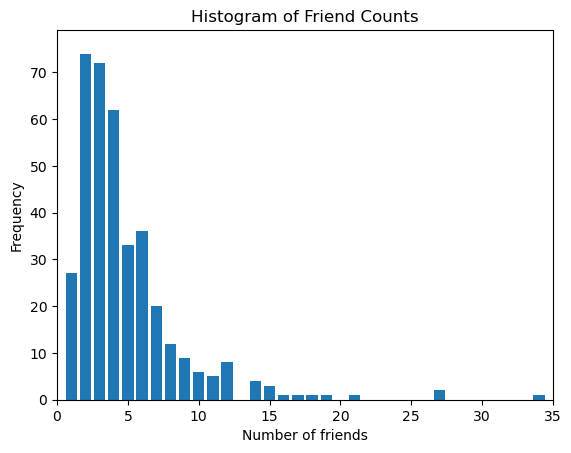

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
friend_counts = Counter(nfriends.values())

print(friend_counts)

xs = range(max(nfriends.values()) + 1)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, max(nfriends.values()) + 1, 0, max(friend_counts.values()) + 5])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of friends")
plt.ylabel("Frequency")
plt.show()

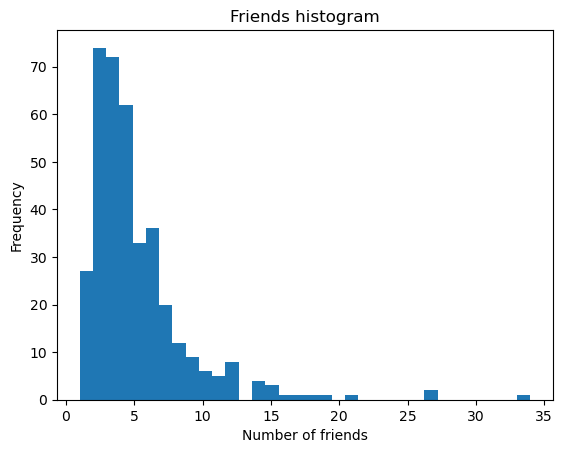

In [40]:
plt.hist(list(nfriends.values()),34) 
plt.title('Friends histogram')
plt.xlabel ('Number of friends')
plt.ylabel ('Frequency')
plt.show()

### Mean

Given a collection ("sample") of continuos variables $x_1, x_2, \ldots, x_n$ the mean is defined as:

$$ \bar x = \frac{1}{n} \sum_{i=1}^n x_i $$

In [41]:
def mean(x):
    if len(x) > 0:
        return sum(x) / len(x)

In [45]:
print(mean(nfriends.values()))


4.823218997361478


In [46]:
nfriends[0] = 350
print(mean(nfriends.values()))

5.731578947368421


In [47]:
%timeit max(nfriends.values())
%timeit min(nfriends.values())
%timeit sum(nfriends.values())
%timeit mean(nfriends.values())

5.15 μs ± 204 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.93 μs ± 40.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.65 μs ± 35.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.77 μs ± 26.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [48]:
# using numpy
%timeit np.max(fr)
%timeit np.min(fr)
%timeit np.sum(fr)
%timeit np.mean(fr)

2.57 μs ± 174 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.53 μs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.48 μs ± 33.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.17 μs ± 121 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [49]:
print("Minimum number of friends:", np.min(fr))
print("Maximum number of friends:", np.max(fr))
print("Mean number of friends:", np.mean(fr))

Minimum number of friends: 1
Maximum number of friends: 34
Mean number of friends: 4.823218997361478


In [50]:
def median (x):
    if len(x) > 0:
        sorted_x = sorted(x)
        mid = len(x) // 2
        
        if len(x) % 2 == 1:
            return sorted_x[mid]
        else:
            down = mid - 1
            return (sorted_x[down]+ sorted_x[mid]) / 2

In [51]:
np.median(fr)

np.float64(4.0)

In [52]:
%timeit (median(nfriends.values()))
%timeit np.median(fr)

14.4 μs ± 249 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.5 μs ± 308 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
